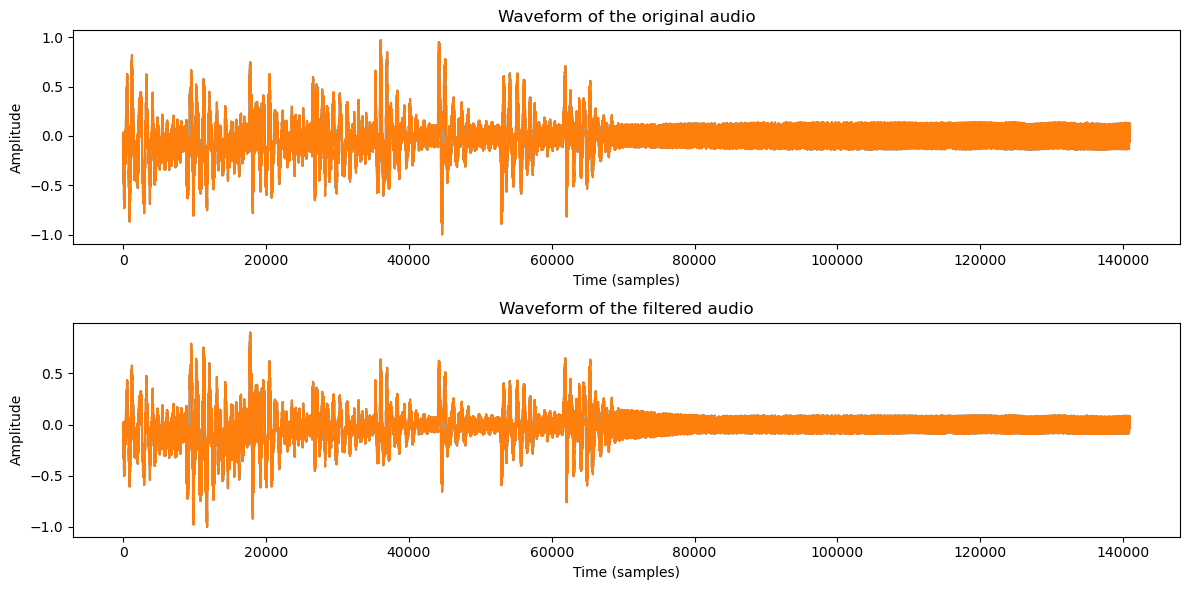

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

class Equalizer:
    def __init__(self, fs):
        self.fs = fs
        self.audio = None

    def apply_equalizer(self, audio, freq_bands, gains, gain_master=1.0):
        spectrum = np.fft.rfft(audio)
        f = np.linspace(0, self.fs/2, len(spectrum), endpoint=True)
        filter = self.create_filter(f, freq_bands, gains)
        spectrum_filtered = spectrum * np.expand_dims(filter, axis=1) * gain_master
        audio_filtered = np.fft.irfft(spectrum_filtered).real
        return audio_filtered

    def create_filter(self, f, freq_bands, gains):
        alpha = 7e-7  
        x = np.ones_like(f)
        for i in range(len(freq_bands)):
            x *= 1 + gains[i] * np.exp(-alpha * (f - self.fs * freq_bands[i] / 2048)**2)
        return x

    def save_audio(self, audio, filename='C:\\Users\\Админ\\Downloads\\filtered_audioNEW37.wav'):
        scale_factor = np.iinfo(np.int16).max
        wavfile.write(filename, self.fs, (audio * scale_factor).astype(np.int16))

    def play_audio(self, audio):
        self.save_audio(audio)
        rate, audio_output = wavfile.read("C:\\Users\\Админ\\Downloads\\filtered_audioNEW37.wav")
        self.audio = audio_output
        return audio_output

# Read the original WAV file
filename = 'C:\\Users\\Админ\\Downloads\\sample-3s.wav'
rate, audio_original = wavfile.read(filename)

# Create an Equalizer object
eq = Equalizer(rate)

# Определение частотных диапазонов и коэффициентов усиления
freq_bands = [100, 500, 2000, 5000]
gains = [1.1, 0.9, 0.7, 1.2]

audio_filtered = eq.apply_equalizer(audio_original, freq_bands, gains, gain_master=1.5)

# Save the filtered audio to a new WAV file
eq.save_audio(audio_filtered, 'C:\\Users\\Админ\\Downloads\\filtered_audioNEW37.wav')

# Plot the waveform of the original and filtered audio
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio_original / np.max(np.abs(audio_original)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the original audio')

plt.subplot(2, 1, 2)
plt.plot(audio_filtered / np.max(np.abs(audio_filtered)))
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform of the filtered audio')

plt.tight_layout()
